# Using Scikit Learn and Python

Cluster Universities into Public University or Private University depending on the features of data points.
Note: For this data we actually have labels so we can use them to evaluate how well the kmeans algorithm worked using classification report and confusion matrix but it really does not make any sense in the real world. Data has 777 observations with 18 feature variables, of which the classification label Private:yes or no is not going to be used by the algorithm

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
df= pd.read_csv('College_Data', index_col=0)
print (df.shape)
print (df.info())


(777, 18)
<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.3+ KB
None


In [5]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Exploratory data analysis and visualization

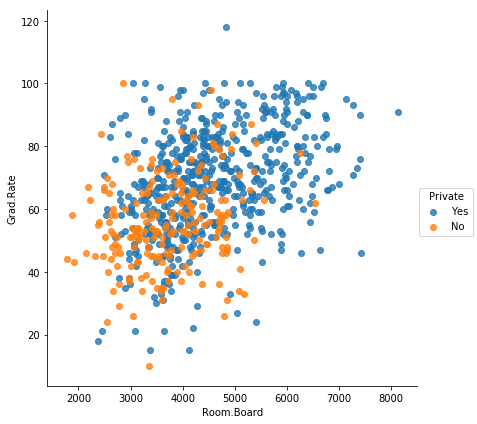

In [7]:
sns.lmplot(x='Room.Board',y= 'Grad.Rate', data=df, hue= 'Private', fit_reg= False, size= 6, aspect= 1)
#little tricky for seaborn to this kind of scatter plot , trick is to use lmplot with regression line fit set to false

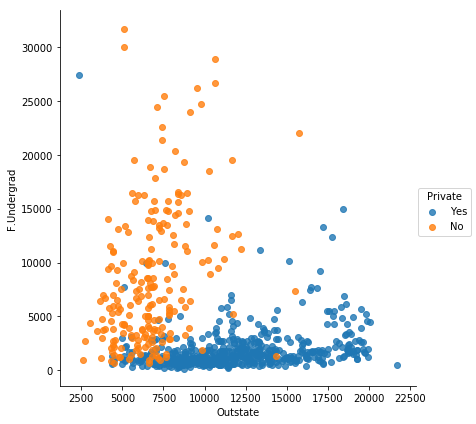

In [8]:
sns.lmplot(x='Outstate',y= 'F.Undergrad', data=df, hue= 'Private', fit_reg= False, size= 6, aspect= 1)

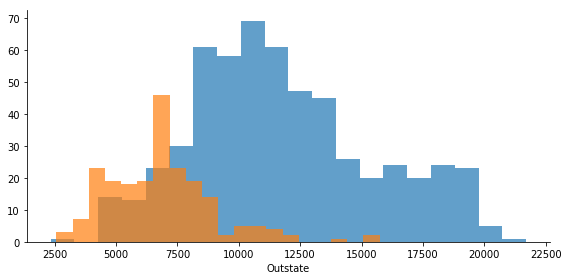

In [9]:
g= sns.FacetGrid(df, hue='Private', size=4, aspect=2)
g= g.map(plt.hist, 'Outstate', bins= 20, alpha=0.7)

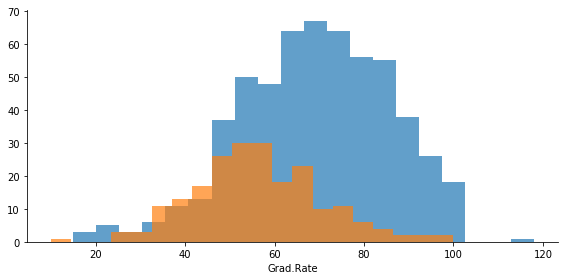

In [10]:
g= sns.FacetGrid(df, hue='Private', size=4, aspect=2)
g= g.map(plt.hist, 'Grad.Rate', bins= 20, alpha=0.7)

In [11]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [12]:
df['Grad.Rate']['Cazenovia College']= 100

c:\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df[df['Grad.Rate']== 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,100
College of Mount St. Joseph,Yes,798,620,238,14,41,1165,1232,9800,4430,400,1150,46,46,11.1,35,6889,100
Grove City College,Yes,2491,1110,573,57,88,2213,35,5224,3048,525,350,65,65,18.4,18,4957,100
Harvard University,Yes,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100
Harvey Mudd College,Yes,1377,572,178,95,100,654,5,17230,6690,700,900,100,100,8.2,46,21569,100
Lindenwood College,Yes,810,484,356,6,33,2155,191,9200,4800,1000,4200,65,85,24.1,9,3480,100
Missouri Southern State College,No,1576,1326,913,13,50,3689,2200,3840,2852,200,400,52,54,20.3,9,4172,100
Santa Clara University,Yes,4019,2779,888,40,73,3891,128,13584,5928,630,1278,88,92,13.9,19,10872,100
Siena College,Yes,2961,1932,628,24,68,2669,616,10800,5100,575,1090,71,82,14.1,42,8189,100


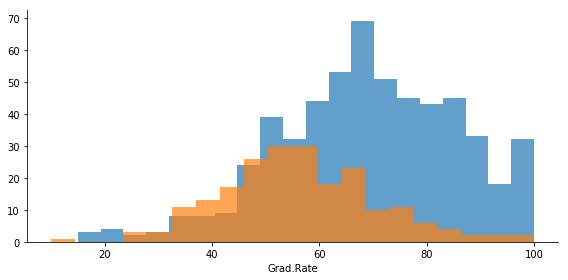

In [14]:
g= sns.FacetGrid(df, hue='Private', size=4, aspect=2)
g= g.map(plt.hist, 'Grad.Rate', bins= 20, alpha=0.7)

In [15]:
df1= df.drop('Private', axis=1)

In [16]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=2)
kmeans.fit(df1)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

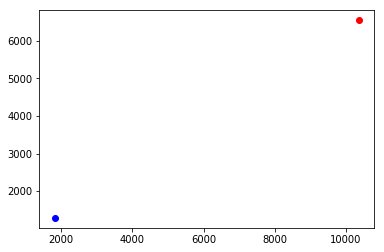

In [18]:
col=['b','r']
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], c= col[0])
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1],c= col[1])


In [19]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

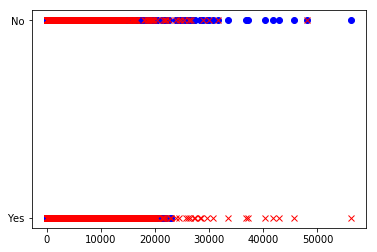

In [20]:
plt.plot(df1, kmeans.labels_,'bo')
plt.plot(df1, df['Private'], 'rx')

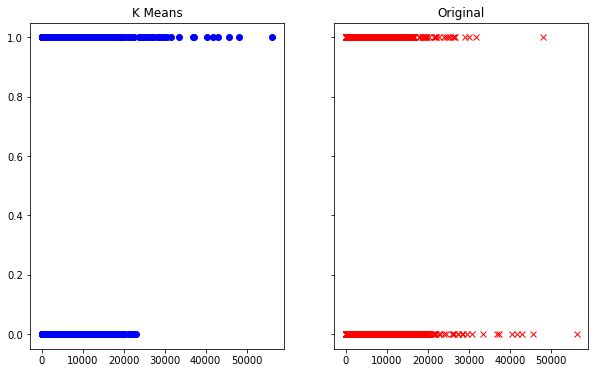

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey= True, figsize= (10,6))
ax1.set_title('K Means')
ax1.plot(df1, kmeans.labels_, 'bo')
ax2.set_title('Original')
ax2.plot(df1, df['Cluster'], 'rx')

In [22]:
def converter(private):
    if private =='Yes':
        return 0
    else:
        return 1

In [23]:
df['Cluster']= df['Private'].apply(converter)

In [24]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
print(confusion_matrix(df['Cluster'], kmeans.labels_))

[[531  34]
 [138  74]]


In [28]:
print(classification_report(df['Cluster'], kmeans.labels_))

             precision    recall  f1-score   support

          0       0.79      0.94      0.86       565
          1       0.69      0.35      0.46       212

avg / total       0.76      0.78      0.75       777



In [29]:
wcss=[]
for i in range(1, 21):
    kmeans_test = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10)
    kmeans_test.fit(df1)
    wcss.append(kmeans_test.inertia_)

Text(0.5,1,'Elbow method to determine ideal number of clusters')

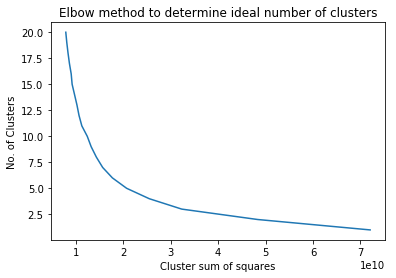

In [31]:
plt.plot(wcss,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Cluster sum of squares')
plt.ylabel('No. of Clusters')
plt.title('Elbow method to determine ideal number of clusters')
